In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
stat_df = pd.read_csv("../data/img-stats.csv")

In [4]:
def analysis_stats(df: pd.DataFrame):
    print("INFO:")
    print(df.info())
    print()

    print("DESCRIBE:")
    print(df.describe().transpose())
    print()

    print("UNIQUE:")
    print(df.nunique())
    print()


    print("NONES:")
    print(df.isna().sum())
    print()

In [5]:
analysis_stats(stat_df)

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014653 entries, 0 to 1014652
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1014653 non-null  int64  
 1   Id           1014653 non-null  object 
 2   ImageUrl     1014608 non-null  object 
 3   ArticleId    1014653 non-null  object 
 4   ArticleIdx   1014653 non-null  int64  
 5   ArticleUrl   1014653 non-null  object 
 6   ArticleLang  1014653 non-null  object 
 7   Status       1014653 non-null  object 
 8   Path         1012669 non-null  object 
 9   Format       911965 non-null   object 
 10  Width        911965 non-null   float64
 11  Height       911965 non-null   float64
 12  AspectRatio  911965 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 100.6+ MB
None

DESCRIBE:
                 count           mean            std    min            25%  \
Unnamed: 0   1014653.0  507326.000000  292905.235678  0.000  25

In [6]:
stat_df["Status"].value_counts()

SUCCESS      758000
FILTERED     153965
SKIPPED       99954
MISSING        1984
EXCEPTION       750
Name: Status, dtype: int64

In [118]:
successful_imgs_df = stat_df[stat_df["Status"] == "SUCCESS"]
analysis_stats(successful_imgs_df)

INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 758000 entries, 0 to 1014652
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   758000 non-null  int64  
 1   Id           758000 non-null  object 
 2   ImageUrl     758000 non-null  object 
 3   ArticleId    758000 non-null  object 
 4   ArticleIdx   758000 non-null  int64  
 5   ArticleUrl   758000 non-null  object 
 6   ArticleLang  758000 non-null  object 
 7   Status       758000 non-null  object 
 8   Path         758000 non-null  object 
 9   Format       758000 non-null  object 
 10  Width        758000 non-null  float64
 11  Height       758000 non-null  float64
 12  AspectRatio  758000 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 81.0+ MB
None

DESCRIBE:
                count           mean            std        min            25%  \
Unnamed: 0   758000.0  507009.834761  292692.971463   0.000000  253413.750000

# Width

In [8]:
successful_imgs_df["Width"].describe()

count    758000.000000
mean        845.807707
std         341.699814
min          64.000000
25%         624.000000
50%         976.000000
75%         976.000000
max        7904.000000
Name: Width, dtype: float64

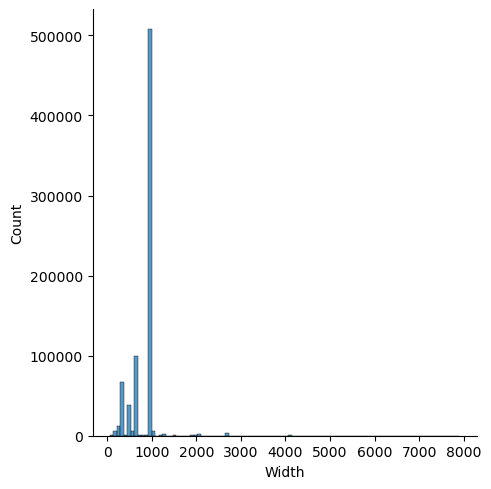

In [9]:
sns.displot(successful_imgs_df["Width"], bins=100)
plt.show()

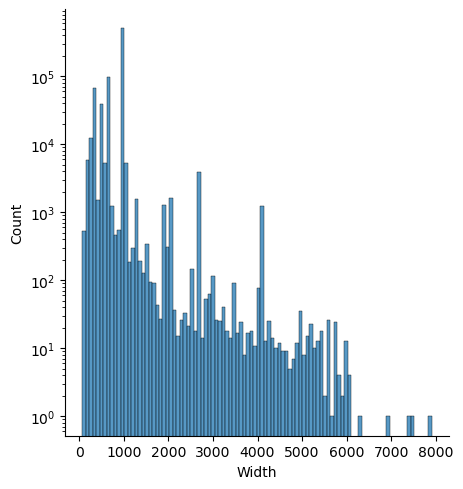

In [53]:
g = sns.displot(successful_imgs_df["Width"], bins=100)
g.ax.set_yscale("log")
plt.show()

In [11]:
successful_imgs_df["Width"].describe()

count    758000.000000
mean        845.807707
std         341.699814
min          64.000000
25%         624.000000
50%         976.000000
75%         976.000000
max        7904.000000
Name: Width, dtype: float64

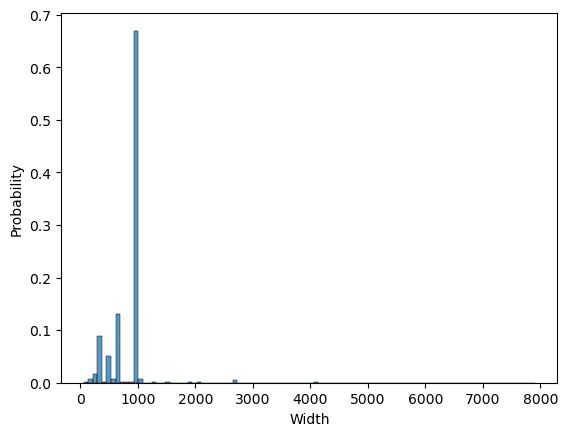

In [12]:
sns.histplot(successful_imgs_df["Width"], stat="probability", bins=100)
plt.show()

# Height

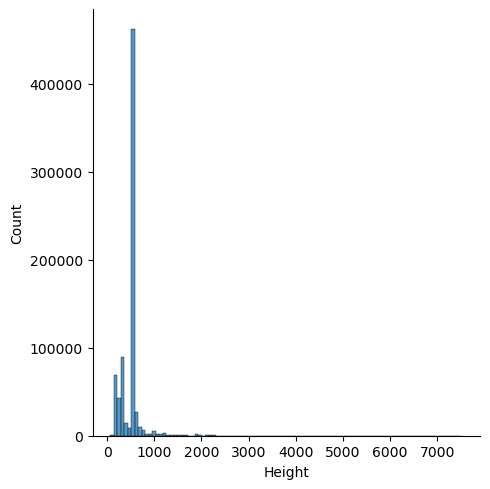

In [13]:
sns.displot(successful_imgs_df["Height"], bins=100)
plt.show()

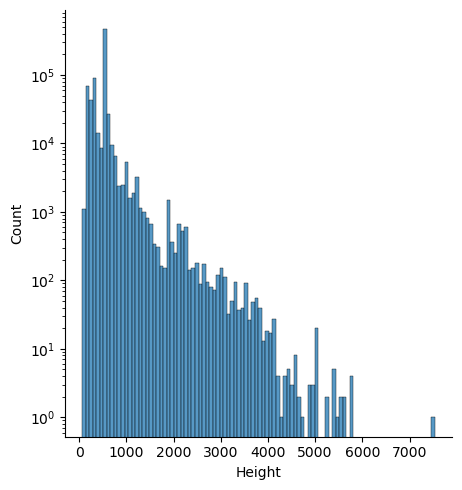

In [49]:
g = sns.displot(successful_imgs_df["Height"], bins=100)
g.ax.set_yscale("log")
plt.show()

# Height-Width Bivariate

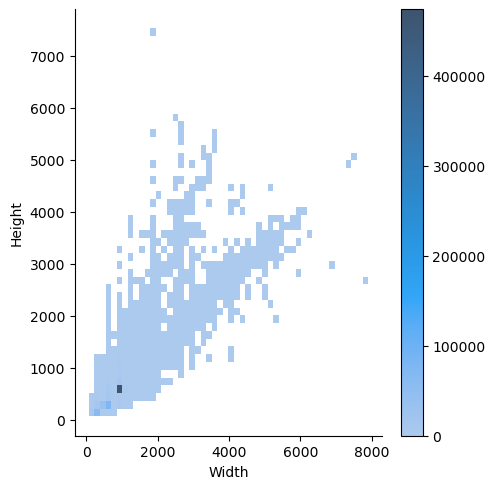

In [72]:
sns.displot(successful_imgs_df, x="Width", y="Height", bins=50, cbar=True)
plt.show()

In [34]:
print(successful_imgs_df[["Width", "Height"]].describe())

               Width         Height
count  758000.000000  758000.000000
mean      845.807707     506.707355
std       341.699814     249.645234
min        64.000000      64.000000
25%       624.000000     351.000000
50%       976.000000     549.000000
75%       976.000000     549.000000
max      7904.000000    7530.000000


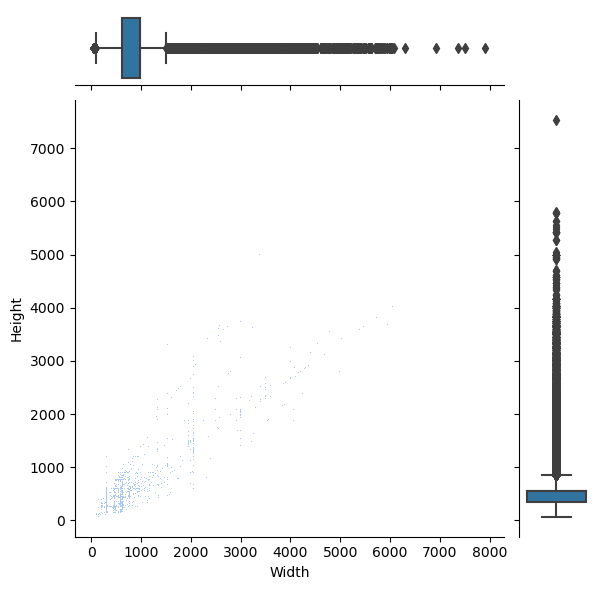

In [46]:
g = sns.JointGrid(data=successful_imgs_df, x="Width", y="Height")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
plt.show()

# Aspect Ratio

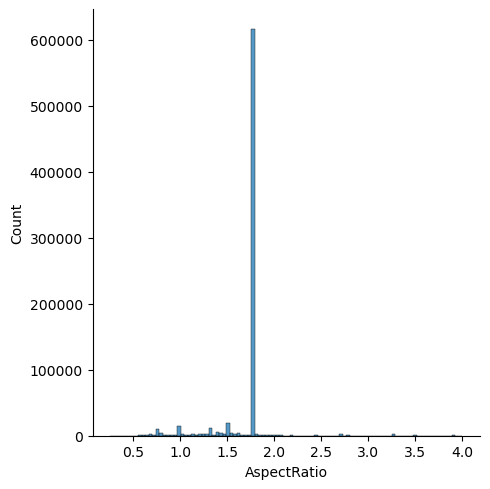

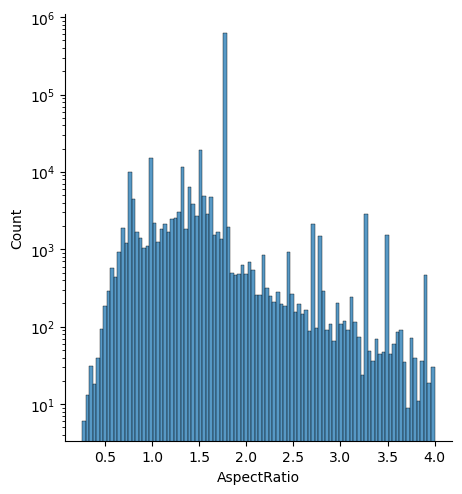

In [43]:
g = sns.displot(successful_imgs_df["AspectRatio"], bins=100)
plt.show()

g = sns.displot(successful_imgs_df["AspectRatio"], bins=100)
g.ax.set_yscale("log")
plt.show()

# Format

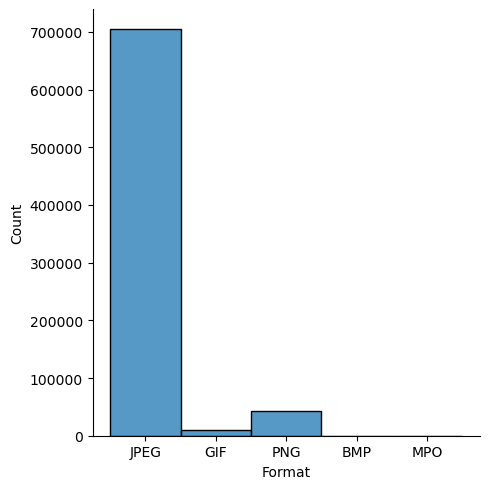

In [75]:
sns.displot(data=successful_imgs_df["Format"])
plt.show()

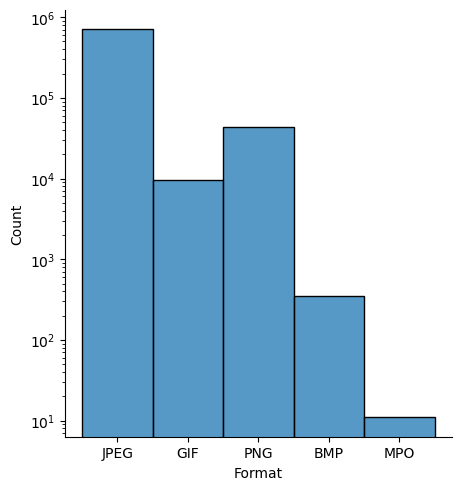

In [76]:
g = sns.displot(data=successful_imgs_df["Format"])
g.ax.set_yscale("log")
plt.show()

# Article URL

In [85]:
img_groupby_articleid_df = stat_df.groupby("ArticleId")["Id"].size().reset_index(name="Count")
print(img_groupby_articleid_df["Count"].transpose().describe())

count    320722.000000
mean          3.163653
std           2.971907
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         458.000000
Name: Count, dtype: float64


In [82]:
import json 
from pathlib import Path

def read_metadata_file(path: Path) -> list[dict]:
    """Read metadata file, where each line contains a JSON. These JSONs are converted to pytho dicts, and a list
    of dicts is returned.

    Args:
        path (Path): Path to metadata file. File should contain a JSON in each line.

    Returns:
        list[dict]: List of JSONs in the metadata file, converted to List of Dictionaries.
    """
    with path.open() as f:
        lines = f.readlines()

    return [json.loads(line) for line in lines]


mdata_dicts = read_metadata_file(Path("/home/salkhon/repo/thesis/data/metadata/english.metadata"))

In [83]:
article_data = {
    "ArticleId": [], 
    "URLCount": []
}

for mdata in mdata_dicts:
    article_data["ArticleId"].append(mdata["id"])
    article_data["URLCount"].append(len(mdata["media_links"]))

In [99]:
article_df = pd.DataFrame(article_data)
article_df.describe()

,URLCount
count,320722.000000
mean,3.163653
std,2.971907
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,458.000000


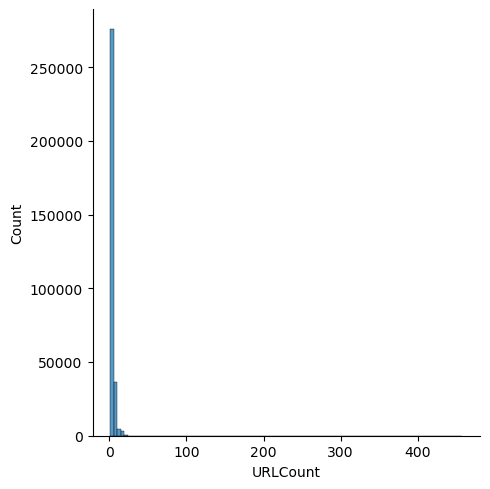

In [91]:
sns.displot(article_df["URLCount"], bins=100)
plt.show()

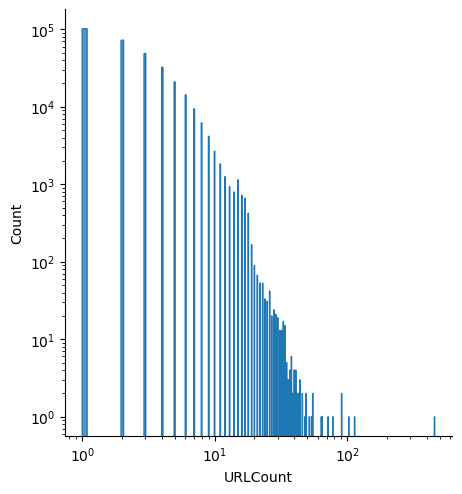

In [117]:
g = sns.displot(article_df["URLCount"], linewidth=1, element='step')
g.ax.set_xscale("log")
g.ax.set_yscale("log")
plt.show()

In [87]:
success_count_groupby_article_df = stat_df.groupby("ArticleId")["Status"].apply(lambda row_status: (row_status == "SUCCESS").sum()).reset_index(name="SuccessCount")

In [88]:
success_count_groupby_article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320722 entries, 0 to 320721
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ArticleId     320722 non-null  object
 1   SuccessCount  320722 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


In [89]:
print(success_count_groupby_article_df.describe())

        SuccessCount
count  320722.000000
mean        2.363418
std         2.128502
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       112.000000


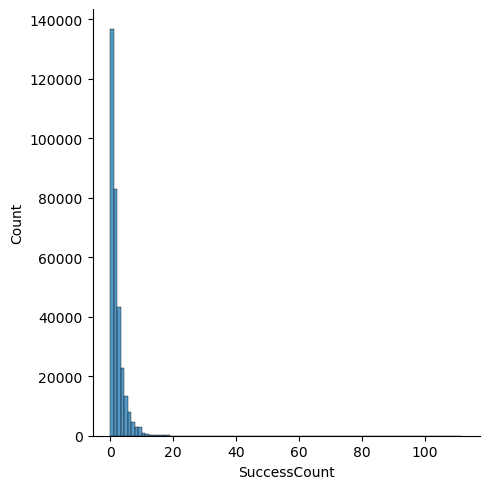

In [107]:
sns.displot(success_count_groupby_article_df["SuccessCount"], bins=100)
plt.show()

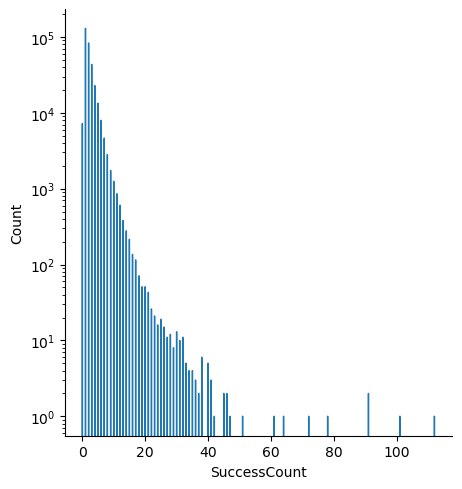

In [116]:
g = sns.displot(success_count_groupby_article_df["SuccessCount"], element="step", linewidth=1)
g.ax.set_yscale("log")
plt.show()

# Filtered

In [119]:
filter_count_groupby_article_df = stat_df.groupby("ArticleId")["Status"].apply(lambda row_status: (row_status == "FILTERED").sum()).reset_index(name="Count")

In [120]:
print(filter_count_groupby_article_df.describe())

               Count
count  320722.000000
mean        0.480057
std         1.488321
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       457.000000


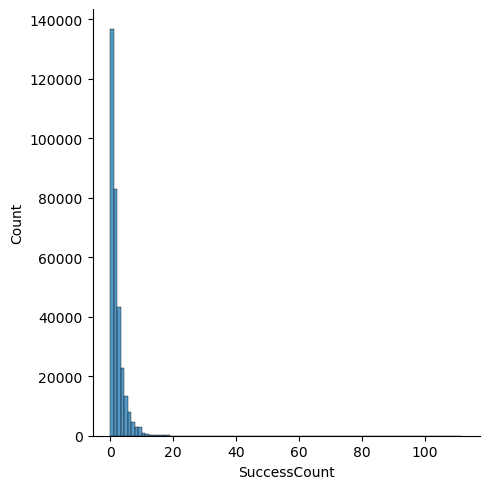

In [121]:
sns.displot(success_count_groupby_article_df["SuccessCount"], bins=100)
plt.show()

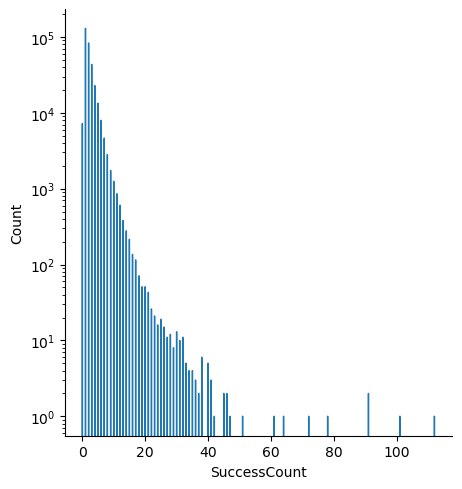

In [124]:
g = sns.displot(success_count_groupby_article_df["SuccessCount"], element="step", linewidth=1)
g.ax.set_yscale("log")
plt.show()